# Options Pricing Library - Demonstration

This notebook demonstrates the options pricing library with:
1. Pricing vanilla calls and puts using three methods
2. Greeks calculations and interpretation
3. Sensitivity analysis (Greeks vs strike and time)
4. Model comparison

**Author**: Finley Sutcliffe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('..')

from models.black_scholes import BlackScholes
from models.binomial_tree import BinomialTree
from models.monte_carlo import MonteCarlo 

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 10

## 1. Basic Option Pricing Example

Parameters: 
 - Current Stock Price (S): £100
 - Strike Price (K): £100 (at-the-money)
 - Time to Maturity (T): 1 year
 - Risk-free Rate (r): 5% per annum
 - Volatility ($\sigma$): 20% per annum


In [2]:
S = 100
K = 100
T = 1.0 
r = 0.05
sigma = 0.20

print("="*50)
print("OPTION PRICING - THREE METHODS COMPARISON")
print("="*50)
print(f"\nParameters:")
print(f"  Stock Price (S): ${S}")
print(f"  Strike Price (K): ${K}")
print(f"  Time to Maturity (T): {T} year")
print(f"  Risk-free Rate (r): {r*100}%")
print(f"  Volatility (sigma): {sigma*100}%")
print()

OPTION PRICING - THREE METHODS COMPARISON

Parameters:
  Stock Price (S): $100
  Strike Price (K): $100
  Time to Maturity (T): 1.0 year
  Risk-free Rate (r): 5.0%
  Volatility (sigma): 20.0%



## Black-Scholes Pricing

In [3]:
bs = BlackScholes(S, K, T, r, sigma)

bs_call = bs.call_price()
bs_put = bs.put_price()

print("Black-Scholes Prices:")
print(f"  Call Option: £{bs_call:.4f}")
print(f"  Put Option:  £{bs_put:.4f}")

parity_lhs = bs_call - bs_put
parity_rhs = S - K * np.exp(-r * T)

print("\n Put-Call Parity Check:")
print(f"  C - P = £{parity_lhs:.4f}")
print(f"  S - K*e^(-rT) = £{parity_rhs:.4f}")
print(f"  Difference: £{abs(parity_lhs - parity_rhs):.10f}")

Black-Scholes Prices:
  Call Option: £10.4506
  Put Option:  £5.5735

 Put-Call Parity Check:
  C - P = £4.8771
  S - K*e^(-rT) = £4.8771
  Difference: £0.0000000000


## Binomial Tree Pricing

In [4]:
bt = BinomialTree(S, K, T, r, sigma)
bt_call_eur = bt.price('call', american=False)
bt_put_eur = bt.price('put', american=False)

print("\n Binomial Tree Prices (European, N=500):")
print(f"  Call Option: £{bt_call_eur:.4f} (diff from BS: £{bt_call_eur - bs_call:+.4f})")
print(f"  Put Option £{bt_put_eur:.4f} (diff from BS: £{bt_put_eur -bs_put:+.4f})")

bt_call_am = bt.price('call', american=True)
bt_put_am = bt.price('put', american=True)

print("\n Binomial Tree Prices (American, N=500):")
print(f"Call Option: £{bt_call_am:.4f} (Early exercise premium: ${bt_call_am - bt_call_eur:+.4f})")
print(f"Put Option: £{bt_put_am:.4f} (Early exercise premium: ${bt_put_am - bt_put_eur:+.4f})")


 Binomial Tree Prices (European, N=500):
  Call Option: £10.4306 (diff from BS: £-0.0200)
  Put Option £5.5536 (diff from BS: £-0.0200)

 Binomial Tree Prices (American, N=500):
Call Option: £10.4306 (Early exercise premium: $+0.0000)
Put Option: £6.0824 (Early exercise premium: $+0.5288)


## 1.3 Monte Carlo Pricing

In [5]:
mc = MonteCarlo(S, K, T, r, sigma, n_sims=500000, seed=42)

mc_call = mc.price('call', antithetic=True)
mc_put = mc.price('put', antithetic=True)

print("\n Monte Carlo Prices (500k simulations, antithetic variates):")
print(f"Call option £{mc_call['price']:.4f} +- £{mc_call['standard_error']:.4f}")
print(f"    95% CI: [£{mc_call["95%_CI"][0]:.4f}, {mc_call["95%_CI"][1]:.4f}]")
print(f"Put option £{mc_put['price']:.4f} +- £{mc_put['standard_error']:.4f}")
print(f"    95% CI: [£{mc_put["95%_CI"][0]:.4f}, {mc_put["95%_CI"][1]:.4f}]")


 Monte Carlo Prices (500k simulations, antithetic variates):
Call option £10.4516 +- £0.0208
    95% CI: [£10.4109, 10.4924]
Put option £5.5811 +- £0.0123
    95% CI: [£5.5571, 5.6051]


# Greeks Analysis

Greeks measure the sensitivity of option prices to various parameters

- **Delta**: Sensitivity to stock price changes
- **Gamma**: Rate of change of Delta
- **Vega**: Sensitivity to volatility changes
- **Theta**: Time decay
- **Rho**: Sensitivity to interest rate changes

In [6]:
print("="*60)
print("GREEKS ANALYSIS (Black-Scholes)")
print("="*60)

print("\n Call Option Greeks:")
print(f"   Delta: {bs.delta('call'):.4f} [for a £1 increase in stock price, call increases by £{bs.delta('call'):.4f}]")
print(f"   Gamma: {bs.gamma():.4f} [for a £1 increase in stock price, delta increases by £{bs.gamma():.4f}]")
print(f"   Vega:  {bs.vega():.4f} [for a 1% increase in volatility, call increases by £{bs.vega()/100:.4f}]")
print(f"   Theta: {bs.theta('call'):.4f} per year [£{bs.theta('call')/365:.4f} per day]")
print(f"   Rho:   {bs.rho('call'):.4f} [for a 1% increase in the risk-free rate, call increases by £{bs.rho('call')/100:.4f}] ")

print("\n put Option Greeks:")
print(f"   Delta: {bs.delta('put'):.4f} [for a £1 increase in stock price, put decreases by £{bs.delta('put'):.4f}]")
print(f"   Gamma: {bs.gamma():.4f} [same as call]")
print(f"   Vega:  {bs.vega():.4f} [same as call]")
print(f"   Theta: {bs.theta('put'):.4f} per year [£{bs.theta('put')/365:.4f} per day]")
print(f"   Rho:   {bs.rho('put'):.4f} [for a 1% increase in the risk-free rate, put decreases by £{bs.rho('put')/100:.4f}] ")

GREEKS ANALYSIS (Black-Scholes)

 Call Option Greeks:
   Delta: 0.6368 [for a £1 increase in stock price, call increases by £0.6368]
   Gamma: 0.0188 [for a £1 increase in stock price, delta increases by £0.0188]
   Vega:  37.5240 [for a 1% increase in volatility, call increases by £0.3752]
   Theta: -1.0908 per year [£-0.0030 per day]
   Rho:   53.2325 [for a 1% increase in the risk-free rate, call increases by £0.5323] 

 put Option Greeks:
   Delta: -0.3632 [for a £1 increase in stock price, put decreases by £-0.3632]
   Gamma: 0.0188 [same as call]
   Vega:  37.5240 [same as call]
   Theta: -6.4140 per year [£-0.0176 per day]
   Rho:   -41.8905 [for a 1% increase in the risk-free rate, put decreases by £-0.4189] 


# Greek Sensitivity Analysis

## Greeks vs Strike Price

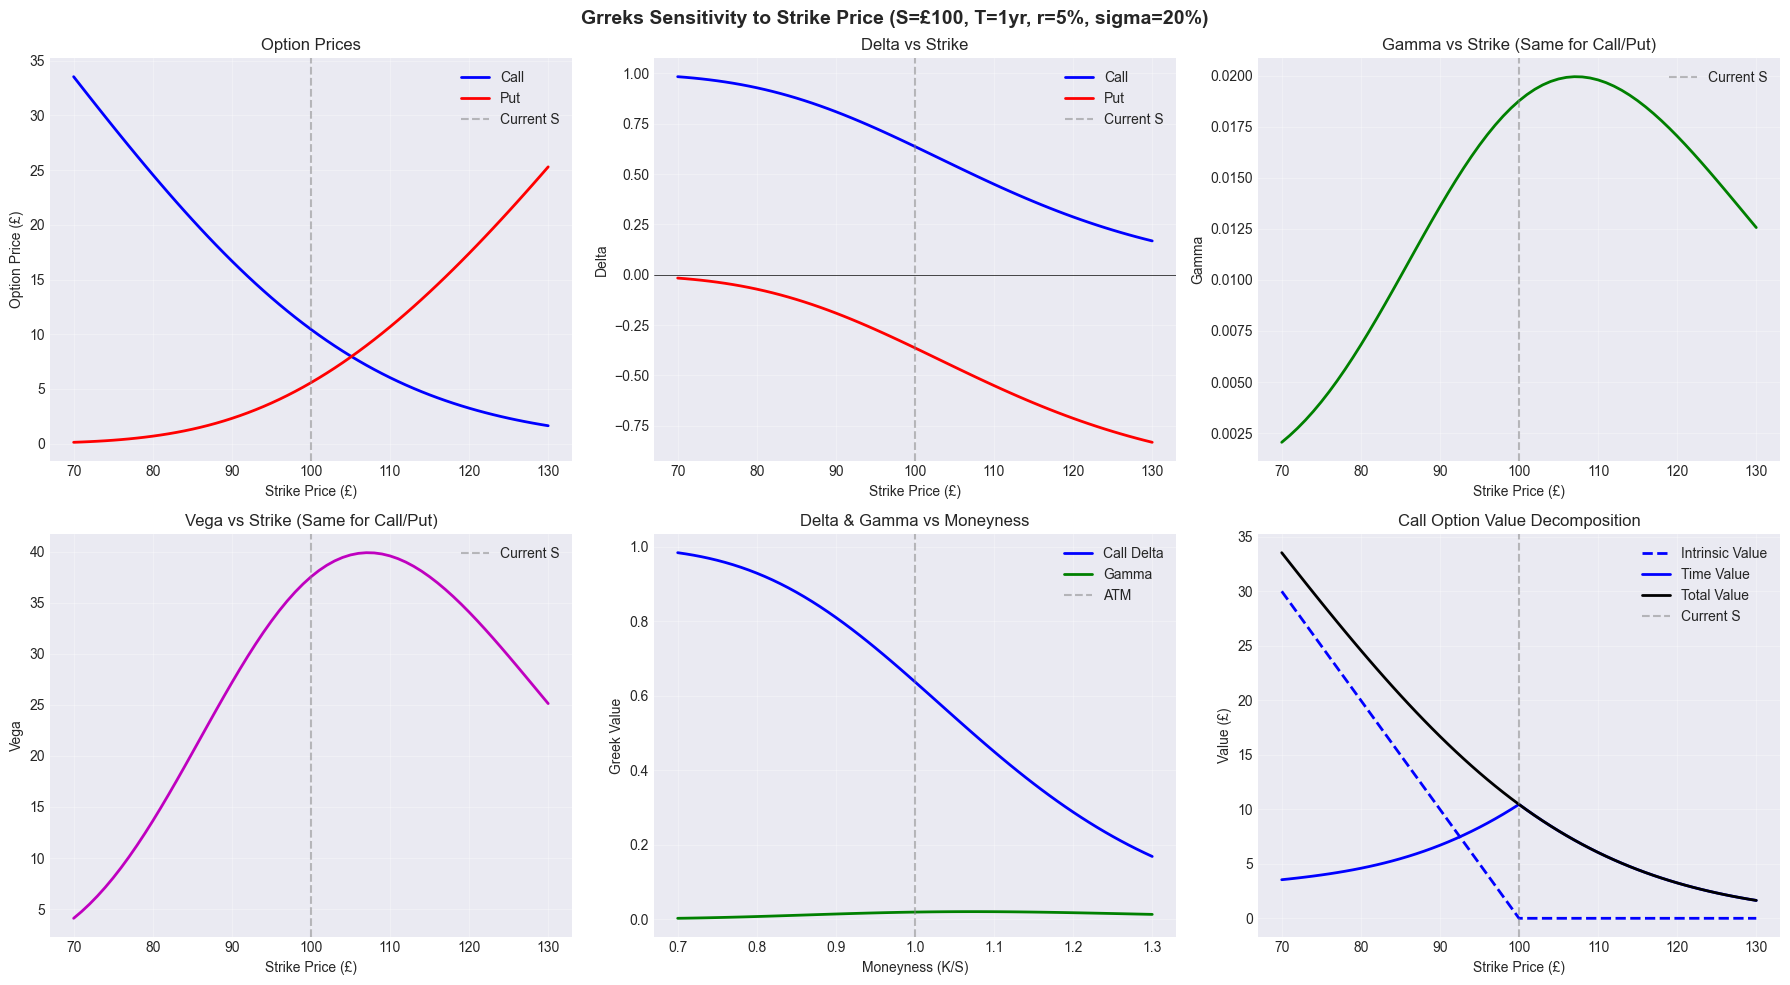

In [7]:
strikes = np.linspace(70,130,61)

call_deltas =[]
put_deltas = []
gammas = []
vegas = []
call_prices = []
put_prices = []

for K_i in strikes:
    bs_temp = BlackScholes(S, K_i, T, r, sigma)
    call_prices.append(bs_temp.call_price())
    put_prices.append(bs_temp.put_price())
    call_deltas.append(bs_temp.delta('call'))
    put_deltas.append(bs_temp.delta('put'))
    gammas.append(bs_temp.gamma())
    vegas.append(bs_temp.vega())

fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle("Grreks Sensitivity to Strike Price (S=£100, T=1yr, r=5%, sigma=20%)",
             fontsize=14, fontweight='bold')

axes[0, 0].plot(strikes, call_prices, 'b-', linewidth=2, label='Call')
axes[0, 0].plot(strikes, put_prices, 'r-', linewidth=2, label='Put')
axes[0, 0].axvline(S, color='gray', linestyle='--', alpha=0.5, label='Current S')
axes[0, 0].set_xlabel('Strike Price (£)')
axes[0, 0].set_ylabel('Option Price (£)')
axes[0, 0].set_title('Option Prices')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(strikes, call_deltas, 'b-', linewidth=2, label='Call')
axes[0, 1].plot(strikes, put_deltas, 'r-', linewidth=2, label='Put')
axes[0, 1].axvline(S, color='gray', linestyle='--', alpha=0.5, label='Current S')
axes[0, 1].axhline(0, color='black', linestyle='-', linewidth=0.5)
axes[0, 1].set_xlabel('Strike Price (£)')
axes[0, 1].set_ylabel('Delta')
axes[0, 1].set_title('Delta vs Strike')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(strikes, gammas, 'g-', linewidth=2)
axes[0, 2].axvline(S, color='gray', linestyle='--', alpha=0.5, label='Current S')
axes[0, 2].set_xlabel('Strike Price (£)')
axes[0, 2].set_ylabel('Gamma')
axes[0, 2].set_title('Gamma vs Strike (Same for Call/Put)')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].plot(strikes, vegas, 'm-', linewidth=2)
axes[1, 0].axvline(S, color='gray', linestyle='--', alpha=0.5, label='Current S')
axes[1, 0].set_xlabel('Strike Price (£)')
axes[1, 0].set_ylabel('Vega')
axes[1, 0].set_title('Vega vs Strike (Same for Call/Put)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

moneyness = strikes / S
axes[1, 1].plot(moneyness, call_deltas, 'b-', linewidth=2, label='Call Delta')
axes[1, 1].plot(moneyness, gammas, 'g-', linewidth=2, label='Gamma')
axes[1, 1].axvline(1, color='gray', linestyle='--', alpha=0.5, label='ATM')
axes[1, 1].set_xlabel('Moneyness (K/S)')
axes[1, 1].set_ylabel('Greek Value')
axes[1, 1].set_title('Delta & Gamma vs Moneyness')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

intrinsic_call = np.maximum(S - strikes, 0)
time_value_call = np.array(call_prices) - intrinsic_call
axes[1, 2].plot(strikes, intrinsic_call, 'b--', linewidth=2, label='Intrinsic Value')
axes[1, 2].plot(strikes, time_value_call, 'b-', linewidth=2, label='Time Value')
axes[1, 2].plot(strikes, call_prices, 'k-', linewidth=2, label='Total Value')
axes[1, 2].axvline(S, color='gray', linestyle='--', alpha=0.5, label='Current S')
axes[1, 2].set_xlabel('Strike Price (£)')
axes[1, 2].set_ylabel('Value (£)')
axes[1, 2].set_title('Call Option Value Decomposition')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

## Greeks vs Time to Maturity

In [ ]:
days = np.linspace(1,365, 73)
times = days / 365

call_deltas_t =[]
put_deltas_t = []
gammas_t = []
vegas_t = []
call_thetas_t =[]
put_thetas_t = []
call_prices_t = []
put_prices_t = []

for T_i in times:
    if T_i > 0:
        bs_temp = BlackScholes(S, K, T_i, r, sigma)
        call_prices_t.append(bs_temp.call_price())
        put_prices_t.append(bs_temp.put_price())
        call_deltas_t.append(bs_temp.delta('call'))
        put_deltas_t.append(bs_temp.delta('put'))
        gammas_t.append(bs_temp.gamma())
        vegas_t.append(bs_temp.vega())    
        call_thetas_t.append(bs_temp.theta('call') / 365)   
        put_thetas_t.append(bs_temp.theta('put') / 365)

fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle('Greeks Sensitivity to Time to Maturity (S=$100, K=$100, r=5%, σ=20%)', 
             fontsize=14, fontweight='bold')

axes[0, 0].plot(days, call_prices_t, 'b-', linewidth=2, label='Call')
axes[0, 0].plot(days, put_prices_t, 'r-', linewidth=2, label='Put')
axes[0, 0].axhline(max(S - K, 0), color='b', linestyle='--', alpha=0.5, label='Call Intrinsic')
axes[0, 0].axhline(max(K - S, 0), color='r', linestyle='--', alpha=0.5, label='Put Intrinsic')
axes[0, 0].set_xlabel('Days to Maturity')
axes[0, 0].set_ylabel('Option Price (£)')
axes[0, 0].set_title('Time Decay of Option Value')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(days, call_deltas_t, 'b-', linewidth=2, label='Call')
axes[0, 1].plot(days, put_deltas_t, 'r-', linewidth=2, label='Put')
axes[0, 1].set_xlabel('Days to Maturity')
axes[0, 1].set_ylabel('Delta')
axes[0, 1].set_title('Delta vs Time')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(days, gammas_t, 'g-', linewidth=2)
axes[0, 2].set_xlabel('Days to Maturity')
axes[0, 2].set_ylabel('Gamma')
axes[0, 2].set_title('Gamma vs Time (Increases Near Expiry)')
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].plot(days, vegas_t, 'm-', linewidth=2)
axes[1, 0].set_xlabel('Days to Maturity')
axes[1, 0].set_ylabel('Vega')
axes[1, 0].set_title('Vega vs Time')
axes[1, 0].grid(True, alpha=0.3)


axes[1, 1].plot(days, call_thetas_t, 'b-', linewidth=2, label='Call')
axes[1, 1].plot(days, put_thetas_t, 'r-', linewidth=2, label='Put')
axes[1, 1].axhline(0, color='black', linestyle='-', linewidth=0.5)
axes[1, 1].set_xlabel('Days to Maturity')
axes[1, 1].set_ylabel('Theta (per day)')
axes[1, 1].set_title('Theta vs Time (Time Decay Rate)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)


time_value_call_t = np.array(call_prices_t) - max(S - K, 0)
axes[1, 2].plot(days, time_value_call_t, 'b-', linewidth=2, label='Call Time Value')
axes[1, 2].set_xlabel('Days to Maturity')
axes[1, 2].set_ylabel('Time Value ($)')
axes[1, 2].set_title('Time Value Decay (ATM Call)')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## 3.3 Volatility Surface (Call Option Prices)



In [ ]:
strike_range = np.linspace(80, 120, 20)
vol_range = np.linspace(0.10, 0.40, 20)

call_surface = np.zeros((len(vol_range), len(strike_range)))

for i, sigma_i in enumerate(vol_range):
    for j, K_i in enumerate(strike_range):
        bs_temp = BlackScholes(S, K_i, T, r, sigma_i)
        call_surface[i, j] = bs_temp.call_price()
        
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

K_grid, sigma_grid = np.meshgrid(strike_range, vol_range * 100)
surf = ax.plot_surface(K_grid, sigma_grid, call_surface, cmap='viridis', alpha=0.9)

ax.set_xlabel('Strike Price ($)', fontsize=11)
ax.set_ylabel('Volatility (%)', fontsize=11)
ax.set_zlabel('Call Option Price ($)', fontsize=11)
ax.set_title('Call Option Price Surface\n(S=$100, T=1yr, r=5%)', fontsize=13, fontweight='bold')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Model Comparison

Compare convergence of Binomial Tree and Monte Carlo to Black-Scholes


In [ ]:
bs_benchmark = BlackScholes(S, K, T, r, sigma)
bs_call_price = bs_benchmark.call_price()

N_values = [10, 20, 50, 100, 200, 500, 1000]
bt_prices = []

for N in N_values:
    bt = BinomialTree(S, K, T, r, sigma, N=N)
    bt_prices.append(bt.price('call', american=False))

sim_values = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
mc_prices = []
mc_errors = []

for n_sim in sim_values:
    mc = MonteCarlo(S, K, T, r, sigma, n_sims=n_sim, seed=42)
    result = mc.price('call', antithetic=True)
    mc_prices.append(result['price'])
    mc_errors.append(result['standard_error'])
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(N_values, bt_prices, 'bo-', linewidth=2, markersize=8, label='Binomial Tree')
axes[0].axhline(bs_call_price, color='r', linestyle='--', linewidth=2, label='Black-Scholes')
axes[0].set_xlabel('Number of Time Steps (N)', fontsize=11)
axes[0].set_ylabel('Call Option Price (£)', fontsize=11)
axes[0].set_title('Binomial Tree Convergence', fontsize=12, fontweight='bold')
axes[0].set_xscale('log')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].errorbar(sim_values, mc_prices, yerr=[1.96*e for e in mc_errors], 
                fmt='go-', linewidth=2, markersize=8, capsize=5, label='Monte Carlo (95% CI)')
axes[1].axhline(bs_call_price, color='r', linestyle='--', linewidth=2, label='Black-Scholes')
axes[1].set_xlabel('Number of Simulations', fontsize=11)
axes[1].set_ylabel('Call Option Price (£)', fontsize=11)
axes[1].set_title('Monte Carlo Convergence', fontsize=12, fontweight='bold')
axes[1].set_xscale('log')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConvergence Summary:")
print(f"Black-Scholes Price: ${bs_call_price:.6f}")
print(f"\nBinomial Tree (N=1000): ${bt_prices[-1]:.6f} (error: {abs(bt_prices[-1]-bs_call_price):.6f})")
print(f"Monte Carlo (1M sims):  ${mc_prices[-1]:.6f} (error: {abs(mc_prices[-1]-bs_call_price):.6f})")

# Practical Trading Example

Delta Hedging

In [ ]:
print("="*50)
print("DELTA HEDGING EXAMPLE")
print("="*50)

# Sell 100 call option contracts (10,000 options)
contracts = 100
options_per_contract = 100
total_options = contracts * options_per_contract

bs = BlackScholes(S=100, K=105, T=0.25, r=0.05, sigma=0.25)  # Slightly OTM, 3 months

call_price = bs.call_price()
delta = bs.delta('call')
gamma = bs.gamma()
theta = bs.theta('call') / 365

print(f"\nPosition: SHORT {total_options:,} call options")
print(f"  Strike: £105, Current Stock: $100, Time: 3 months")
print(f"  Option Price: £{call_price:.4f}")
print(f"  Premium Received: £{call_price * total_options:,.2f}")

print(f"\nGreeks Exposure (per option):")
print(f"  Delta: {delta:.4f}")
print(f"  Gamma: {gamma:.6f}")
print(f"  Theta: £{theta:.4f} per day")

print(f"\nTotal Portfolio Exposure:")
print(f"  Delta: {-delta * total_options:,.2f} (negative because we're short)")
print(f"  Gamma: {-gamma * total_options:,.4f}")
print(f"  Theta: £{-theta * total_options:,.2f} per day")

# Delta hedge
shares_to_buy = delta * total_options
hedge_cost = shares_to_buy * S

print(f"\nDelta Hedge:")
print(f"  Buy {shares_to_buy:,.0f} shares at £{S}")
print(f"  Cost: £{hedge_cost:,.2f}")
print(f"  Net Investment: £{hedge_cost - call_price * total_options:,.2f}")

# P&L scenarios
print(f"\nP&L Scenarios (next day):")
stock_changes = [-2, -1, 0, 1, 2]
for dS in stock_changes:
    new_S = S + dS
    bs_new = BlackScholes(new_S, 105, 0.25 - 1/365, 0.05, 0.25)
    new_call_price = bs_new.call_price()
    
    option_pnl = -(new_call_price - call_price) * total_options
    stock_pnl = dS * shares_to_buy
    theta_pnl = -theta * total_options
    total_pnl = option_pnl + stock_pnl + theta_pnl
    
    print(f"  Stock £{S} -> £{new_S}: P&L = £{total_pnl:+,.2f} " +
          f"(Options: £{option_pnl:+,.2f}, Stock: £{stock_pnl:+,.2f}, Theta: £{theta_pnl:+,.2f})")